In [1]:
from google.colab import drive
path = drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import csv
import collections
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
# Split:  
# Training: 70
# Validation: 20
# Test: 10

In [3]:
def get_data(file_name):
  with open(file_name, newline='') as csvfile:
    content = csv.reader(csvfile)
    line_count = 0
    for row in content:
      if line_count > 0:
        data = [float(row[0]), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5]), float(row[6])]
        all_data.append(data)
      
      line_count += 1  


In [4]:
all_data = []
get_data(r'/content/drive/MyDrive/Capstone Material/Code/final_train_data.csv')
data = np.array(all_data)
print(data.shape)
np.random.shuffle(data)

training_data = []
training_label = []

for d in data:
  training_data.append([d[2], d[3], d[4], d[5], d[6]])
  training_label.append([d[0], d[1]])

(2656, 7)


In [5]:
all_data = []
get_data(r'/content/drive/MyDrive/Capstone Material/Code/final_test_data.csv')
data = np.array(all_data)
print(data.shape)
np.random.shuffle(data)

testing_data = []
testing_label = []

for d in data:
  if [d[2], d[3], d[4]] not in training_data:
    testing_data.append([d[2], d[3], d[4], d[5], d[6]])
    testing_label.append([d[0], d[1]])

print(len(testing_data))

(592, 7)
592


In [6]:
# take in a list of points and group them by points that are within 2m of each other, then return the mean of the longest array
def find_point_from_neighbors(neighbor_points):
  groups = []

  for p in range(len(neighbor_points)):
    temp = []
    temp.append(neighbor_points[p])

    while p < (len(neighbor_points) -1) and (neighbor_points[p+1] - temp[0]) <= 2:
      temp.append(neighbor_points[p+1])
      p+=1
      
    groups.append(temp)
  
  arr_lens = [len(g) for g in groups]
  return np.mean(groups[np.argmax(np.array(arr_lens))]) # np.argmax(...(longest_arr)) returns the index of the longest list



def loss(outputs, labels):
  results = np.square(np.subtract(outputs,labels)) # MSE
  x, y = [], []
  for r in results:
    x.append(r[0])
    y.append(r[1])
  
  plt.title("Loss")
  plt.scatter(x, y, label="xy_loss_per point")
  plt.xlabel("x_loss")
  plt.ylabel("y_loss")
  plt.legend(loc='best')
  plt.show()

  print('Loss per point: ', results)
  print('Average loss on x values: ', np.array(x).mean())
  print('Average loss on y values: ', np.array(y).mean())

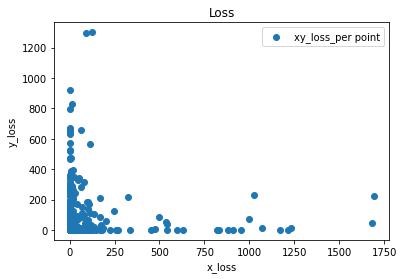

Loss per point:  [[  1.33556544  87.216921  ]
 [  1.21       123.68405511]
 [  7.64153878  76.5266292 ]
 ...
 [  9.63067778  40.144896  ]
 [  0.37658678   5.66175586]
 [  0.20753086   4.990756  ]]
Average loss on x values:  49.25855588114201
Average loss on y values:  61.62674627037467


In [7]:
num_neighbors = 10
neigh = NearestNeighbors(n_neighbors=num_neighbors)
neigh.fit(training_data)
nn = neigh.kneighbors(testing_data, return_distance=False)

xy_outputs = []
for point in range(len(nn)): 
  x, y = [], []
  for neighbor in range(num_neighbors):
    res = training_label[nn[point][neighbor]]
    x.append(res[0])
    y.append(res[1])
  x.sort()
  y.sort()
  xy_outputs.append((find_point_from_neighbors(x), find_point_from_neighbors(y)))

loss(xy_outputs, testing_label)